In [64]:
"""generate 100 datapoints for the function f(t)= sin(t) where t is in [0,1]"""
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

def f(t):
    return math.sin(10*t)

t = np.linspace(0.0, 1.00, 100)
y = np.zeros(100)
for i in range(100):
    y[i] = f(t[i])

"""store the datapoints in a file called data.csv file"""
data= pd.DataFrame({'t':t, 'y':y})
data.to_csv('data.csv', index=False)
data



,t,y
0,0.000000,0.000000
1,0.010101,0.100838
2,0.020202,0.200649
3,0.030303,0.298414
4,0.040404,0.393137
...,...,...
95,0.959596,-0.170347
96,0.969697,-0.268843
97,0.979798,-0.364599
98,0.989899,-0.456637


In [104]:
y

array([ 0.        ,  0.10083842,  0.20064886,  0.2984138 ,  0.39313661,
        0.48385164,  0.56963411,  0.64960951,  0.72296256,  0.78894546,
        0.84688556,  0.8961922 ,  0.93636273,  0.96698762,  0.98775469,
        0.99845223,  0.99897117,  0.98930624,  0.96955595,  0.93992165,
        0.90070545,  0.85230712,  0.79522006,  0.73002623,  0.65739025,
        0.57805259,  0.49282204,  0.40256749,  0.30820902,  0.21070855,
        0.11106004,  0.01027934, -0.09060615, -0.19056796, -0.28858706,
       -0.38366419, -0.47483011, -0.56115544, -0.64176014, -0.7158225 ,
       -0.7825875 , -0.84137452, -0.89158426, -0.93270486, -0.96431712,
       -0.98609877, -0.99782778, -0.99938456, -0.99075324, -0.97202182,
       -0.94338126, -0.90512352, -0.85763861, -0.80141062, -0.73701276,
       -0.66510151, -0.58640998, -0.50174037, -0.41195583, -0.31797166,
       -0.22074597, -0.12126992, -0.0205576 ,  0.0803643 ,  0.18046693,
        0.27872982,  0.37415123,  0.46575841,  0.55261747,  0.63

In [65]:
"""create a 100* 15 matrix X where each row is a datapoint (t, t^2, t^3, ..., t^15)"""
A= np.ones((100,15))
for i in range(100):
    for j in range(15):
        A[i][j]= t[i]**(j)
A


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01010101e-02, 1.02030405e-04, ...,
        1.12817810e-24, 1.13957384e-26, 1.15108468e-28],
       [1.00000000e+00, 2.02020202e-02, 4.08121620e-04, ...,
        4.62101750e-21, 9.33538888e-23, 1.88593715e-24],
       ...,
       [1.00000000e+00, 9.79797980e-01, 9.60004081e-01, ...,
        7.82777756e-01, 7.66964064e-01, 7.51469841e-01],
       [1.00000000e+00, 9.89898990e-01, 9.79900010e-01, ...,
        8.85300222e-01, 8.76357796e-01, 8.67505697e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [66]:
# """in-built least square function to find the coefficients"""
# from numpy.linalg import lstsq
# coeff= lstsq(A,y)[0]


In [67]:
"""create a column vector b that has the values of f(t) for each datapoint"""
b= np.zeros((100,1))
for i in range(100):
    b[i]= f(t[i])
b

array([[ 0.        ],
       [ 0.10083842],
       [ 0.20064886],
       [ 0.2984138 ],
       [ 0.39313661],
       [ 0.48385164],
       [ 0.56963411],
       [ 0.64960951],
       [ 0.72296256],
       [ 0.78894546],
       [ 0.84688556],
       [ 0.8961922 ],
       [ 0.93636273],
       [ 0.96698762],
       [ 0.98775469],
       [ 0.99845223],
       [ 0.99897117],
       [ 0.98930624],
       [ 0.96955595],
       [ 0.93992165],
       [ 0.90070545],
       [ 0.85230712],
       [ 0.79522006],
       [ 0.73002623],
       [ 0.65739025],
       [ 0.57805259],
       [ 0.49282204],
       [ 0.40256749],
       [ 0.30820902],
       [ 0.21070855],
       [ 0.11106004],
       [ 0.01027934],
       [-0.09060615],
       [-0.19056796],
       [-0.28858706],
       [-0.38366419],
       [-0.47483011],
       [-0.56115544],
       [-0.64176014],
       [-0.7158225 ],
       [-0.7825875 ],
       [-0.84137452],
       [-0.89158426],
       [-0.93270486],
       [-0.96431712],
       [-0

# (1.a)  Least Squares using QR Factorization- Modified Gram Schmidt

In [68]:
import numpy as np


def qr_mgs_decompose(matrix: np.array) -> (np.array, np.array):
    """
    For n x m matrix return Q1 and R1 components of QR decomposition using
    the modified Gram-Schmidt process, where R1 is n x n upper triangular
    and Q1 is m x n and have orthogonal columns.
    """
    n = matrix.shape[1]
    q1 = np.array(matrix, dtype='float64')
    r1 = np.zeros((n, n))
    for k in range(n):
        a_k = q1[..., k]
        r1[k,k] = np.linalg.norm(a_k)
        a_k /= r1[k, k]
        for i in range(k+1, n):
            a_i = q1[..., i]
            r1[k,i] = np.transpose(a_k) @ a_i
            a_i -= r1[k, i] * a_k
    return q1, r1

Q_,R_= qr_mgs_decompose(A)


In [101]:
Q_

array([[ 0.1       , -0.1714816 ,  0.21699757, ...,  0.22873575,
        -0.20857698,  0.18775032],
       [ 0.1       , -0.16801733,  0.2038462 , ..., -0.13169633,
         0.17486751, -0.21050754],
       [ 0.1       , -0.16455305,  0.19096323, ..., -0.20893178,
         0.20616911, -0.18612444],
       ...,
       [ 0.1       ,  0.16455305,  0.19096323, ..., -0.20893178,
        -0.20616912, -0.18612469],
       [ 0.1       ,  0.16801733,  0.2038462 , ..., -0.13169633,
        -0.17486756, -0.21050772],
       [ 0.1       ,  0.1714816 ,  0.21699757, ...,  0.22873574,
         0.20857697,  0.18774997]])

In [69]:
"""condidtion numbers of Q and R"""
norm_Q=np.linalg.cond(Q_,2)
norm_R=np.linalg.cond(R_,2)
norm_A=np.linalg.cond(A,2)
print("2-norm of Q is", norm_Q)
print("2-norm of R is", norm_R)
print("2-norm of A is", norm_A)


2-norm of Q is 1.0000007264401622
2-norm of R is 22717773636.796196
2-norm of A is 22717771616.09055


# Back Substitution

In [70]:
"""code for implementing the back substitution"""
def back_substitution(R,b):
    m,n = R.shape
    x=np.zeros(n)
    for i in range(n-1,-1,-1):
        x[i] = (b[i] - R[i,i+1:n] @ x[i+1:n]) / R[i,i]
    return x

In [71]:
"""solve the least squares problem using the QR factorization"""
def least_squares(A,b):
    Q,R = qr_mgs_decompose(A)
    return back_substitution(R, Q.T @ b)



In [72]:
x = least_squares(A,b)
x


array([ 4.13041619e-07,  9.99984242e+00,  9.58212618e-03, -1.66911340e+02,
        3.48407268e+00,  8.01597664e+02,  1.99384178e+02, -2.88441794e+03,
        2.97947319e+03, -4.50378567e+03,  1.29078718e+04, -1.88254163e+04,
        1.38367981e+04, -5.13342716e+03,  7.74795920e+02])

In [73]:
b_=A@x
b.shape

(100, 1)

# Polynomial definition P_14(x)

In [74]:
"""fit the 14th degree polynomial to the datapoints"""
def polynomial(coeff_, degree):
    y=np.zeros(100)
    for i in range(100):
        for j in range(degree+1):
            y[i]+= coeff_[j]*(t[i]**j)
    return y

p=polynomial(x,14)
p



array([ 4.13041619e-07,  1.00838000e-01,  2.00648466e-01,  2.98413695e-01,
        3.93136759e-01,  4.83851923e-01,  5.69634402e-01,  6.49609734e-01,
        7.22962664e-01,  7.88945442e-01,  8.46885439e-01,  8.96192009e-01,
        9.36362504e-01,  9.66987410e-01,  9.87754517e-01,  9.98452110e-01,
        9.98971124e-01,  9.89306259e-01,  9.69556037e-01,  9.39921792e-01,
        9.00705623e-01,  8.52307312e-01,  7.95220249e-01,  7.30026402e-01,
        6.57390382e-01,  5.78052671e-01,  4.92822071e-01,  4.02567458e-01,
        3.08208925e-01,  2.10708404e-01,  1.11059853e-01,  1.02791305e-02,
       -9.06063656e-02, -1.90568170e-01, -2.88587237e-01, -3.83664324e-01,
       -4.74830184e-01, -5.61155442e-01, -6.41760072e-01, -7.15822366e-01,
       -7.82587311e-01, -8.41374284e-01, -8.91583995e-01, -9.32704589e-01,
       -9.64316870e-01, -9.86098568e-01, -9.97827633e-01, -9.99384488e-01,
       -9.90753259e-01, -9.72021928e-01, -9.43381443e-01, -9.05123768e-01,
       -8.57638912e-01, -

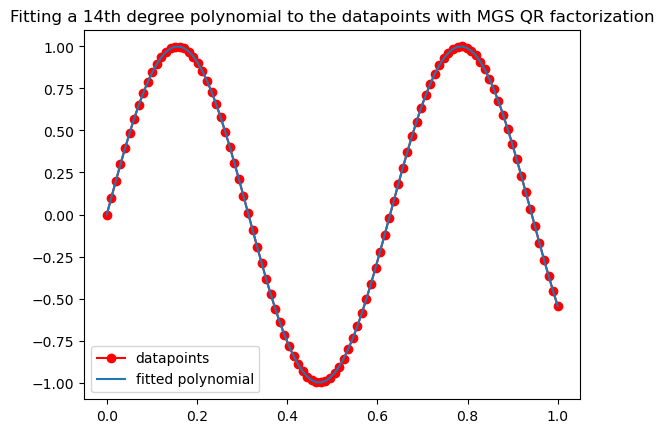

In [76]:
"""plot the datapoints and the fitted polynomial"""
plt.plot(t,y,"r-o",label='datapoints')
plt.plot(t,p, label='fitted polynomial')
plt.legend()
plt.title("Fitting a 14th degree polynomial to the datapoints with MGS QR factorization")
plt.savefig('MGSpoly.png')
plt.show()

# ------------------------------------------------------------------

# (1.b) Least Squares using QR Factorization- Householder factorization.

In [77]:
import numpy as np

def householder_reflection(x):
    """
    Compute the Householder reflection matrix for a given vector x.
    """
    v = x / (x[0] + np.copysign(np.linalg.norm(x), x[0]))
    v[0] = 1
    H = np.eye(x.shape[0])
    H -= (2 / np.dot(v, v)) * np.outer(v, v)
    return H

def householder_qr_factorization(A):
    """
    Compute the QR factorization of a matrix A using Householder reflection.
    """
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    for j in range(n):
        x = R[j:, j]
        H = householder_reflection(x)
        R[j:, j:] = H @ R[j:, j:]
        Q[:, j:] = Q[:, j:] @ H.T
    return Q, R

# Example usage
Q_h, R_h = householder_qr_factorization(A)
print("Q:\n", Q_h)
print("R:\n", R_h)

Q:
 [[-0.1        -0.1714816  -0.21699757 ... -0.04903709 -0.05158455
  -0.08195925]
 [-0.1        -0.16801733 -0.2038462  ...  0.17025447  0.17040656
   0.19164493]
 [-0.1        -0.16455305 -0.19096323 ... -0.19815395 -0.20319649
  -0.17999191]
 ...
 [-0.1         0.16455305 -0.19096323 ...  0.63898578 -0.31316644
   0.02318296]
 [-0.1         0.16801733 -0.2038462  ... -0.31116946  0.62822027
  -0.24818005]
 [-0.1         0.1714816  -0.21699757 ...  0.0361779  -0.22958183
   0.11393141]]
R:
 [[-1.00000000e+01 -5.00000000e+00 -3.35016835e+00 ... -8.12548374e-01
  -7.58236888e-01 -7.11178139e-01]
 [-2.82412982e-15  2.91576465e+00  2.91576465e+00 ...  1.20710257e+00
   1.13884258e+00  1.07835578e+00]
 [-2.82412982e-15 -6.36024067e-17 -7.60299607e-01 ... -1.14426014e+00
  -1.10391243e+00 -1.06562526e+00]
 ...
 [-3.45556916e-15 -1.51012723e-16 -3.23407902e-17 ... -5.90159588e-23
   8.78291994e-24 -2.36640677e-24]
 [-3.50414142e-15 -3.06865691e-18  5.24604566e-17 ... -7.26615437e-24
   1.

In [78]:
"""solve using back substitution"""
"""call the function back_substitution"""
x_h = back_substitution(R_h, Q_h.T @ b)
p_householder=polynomial(x_h,14)

In [79]:
error_householder=np.linalg.norm(p_householder-b,2)
error_householder

66.47188248158425

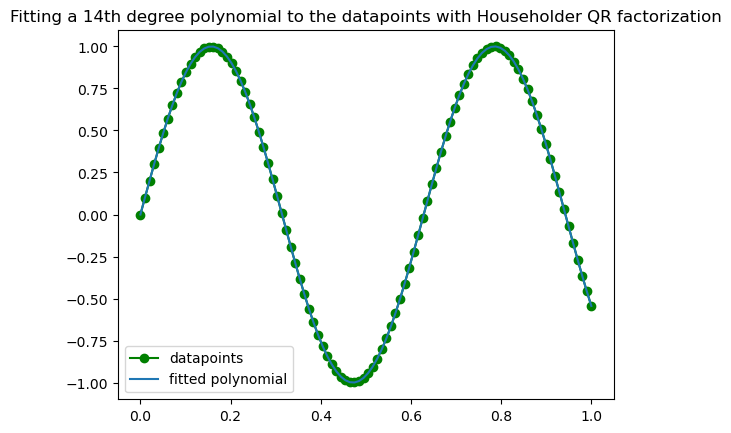

In [80]:
"""plot the datapoints and the fitted polynomial"""
plt.plot(t,y,"g-o",label='datapoints')
plt.plot(t,p_householder, label='fitted polynomial')
plt.legend()
plt.title("Fitting a 14th degree polynomial to the datapoints with Householder QR factorization")
plt.savefig('Householderpoly.png')
plt.show()


# ------------------------------------------------------------------

# (1.c) Least Squares Using SVD

In [81]:
import numpy as np

def least_squares_svd(A, b):
    """
    Solve the least squares problem min ||Ax - b||_2 using SVD.
    """
    U, s, Vt = np.linalg.svd(A, full_matrices=False)
    # d = np.zeros_like(A.T @ b)
    # d[:len(np.diag(s))] = 1 / s
    # x = Vt.T @ np.diag(d) @ U.T @ b
    """convert s to a diagonal matrix and then take the inverse"""
    s=np.diag(s)
    s_inv=np.linalg.inv(s)
    t=np.transpose(U) @ b
    y= s_inv @ t
    V=np.transpose(Vt)
    x=V @ y
    return x

# Example usage
x_svd = least_squares_svd(A, b)
print("x:", x_svd)

x: [[-1.60389020e-07]
 [ 1.00000601e+01]
 [-3.14922285e-03]
 [-1.66610619e+02]
 [-2.95948231e-01]
 [ 8.30456539e+02]
 [ 5.52238844e+01]
 [-2.39204402e+03]
 [ 1.80111043e+03]
 [-2.50883100e+03]
 [ 1.05301086e+04]
 [-1.68740567e+04]
 [ 1.27872869e+04]
 [-4.80045007e+03]
 [ 7.27561029e+02]]


In [82]:
x_svd.shape

(15, 1)

In [83]:
"""call the function polynomial"""
p_svd=polynomial(x_svd,14)


In [84]:
error_svd=np.linalg.norm(p_svd-b,2)
error_svd

66.47188248158271

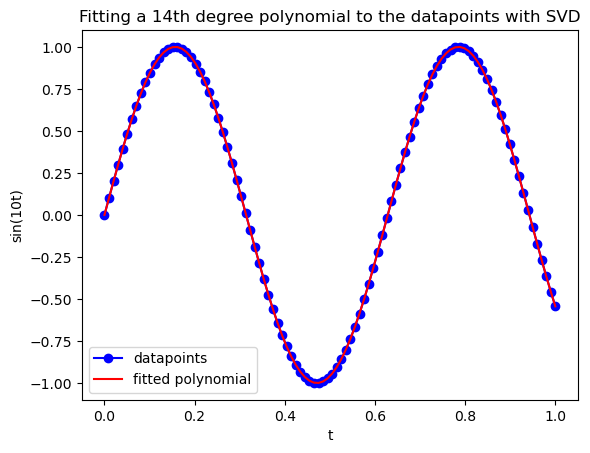

In [85]:
"""plot the datapoints and the fitted polynomial"""
plt.plot(t,y,"b-o",label='datapoints')
plt.plot(t,p_svd, "r-",label='fitted polynomial')
plt.legend()
plt.xlabel("t")
plt.ylabel("sin(10t)")
plt.title("Fitting a 14th degree polynomial to the datapoints with SVD")
plt.savefig('SVDpoly.png')
plt.show()

# ------------------------------------------------------------------

# (1.d) Least Squares using Normal Equations

In [86]:
"""normal equations"""
"""solve the least squares problem using the normal equations"""
def normal_equations(A,b):
    A_t=np.transpose(A)
    A_t_A=A_t @ A
    A_t_b=A_t @ b
    x=np.linalg.solve(A_t_A,A_t_b)
    return x


In [87]:
x_normal=normal_equations(A,b)

In [88]:
"""fit the 14th degree polynomial to the datapoints"""
p_normal=polynomial(x_normal,14)


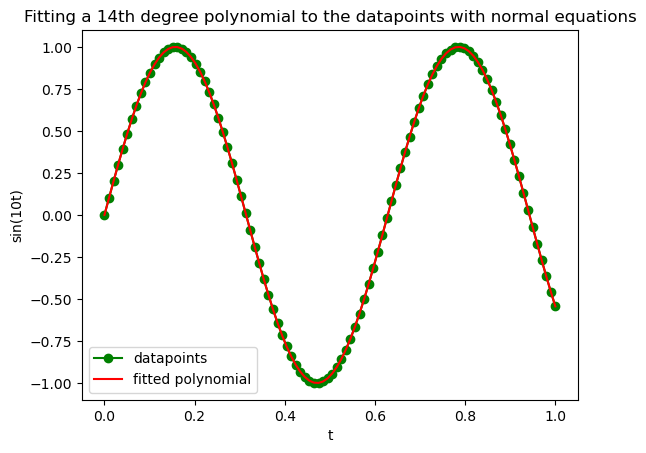

In [89]:
"""plot the datapoints and the fitted polynomial"""
plt.plot(t,y,"g-o",label='datapoints')
plt.plot(t,p_normal, "r-",label='fitted polynomial')
plt.xlabel("t")
plt.ylabel("sin(10t)")
plt.legend()
plt.title("Fitting a 14th degree polynomial to the datapoints with normal equations")
plt.savefig('normalpoly.png')
plt.show()

In [90]:
error_normal=np.linalg.norm(p_normal-b,2)
error_normal

66.47188275756871

In [91]:
"""maximum error and minimum error"""
error={error_mgs:"MGS", error_householder:"Householder", error_svd:"SVD", error_normal:"Normal equations"}
max_error=max(error.keys())
min_error=min(error.keys())
print("maximum error is", max_error," occured in ", error[max_error])
print("minimum error is", min_error," occured in ", error[min_error])


maximum error is 66.47188275756871  occured in  Normal equations
minimum error is 66.47188248158271  occured in  SVD


In [92]:
"""solution using the in-built least square function"""
from numpy.linalg import lstsq
coeff= lstsq(A,y)[0]
coeff

/var/folders/ty/fff3vpc97flg83g8031bxxrc0000gn/T/ipykernel_785/3393798901.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff= lstsq(A,y)[0]


array([-1.60389022e-07,  1.00000601e+01, -3.14922284e-03, -1.66610619e+02,
       -2.95948231e-01,  8.30456539e+02,  5.52238844e+01, -2.39204402e+03,
        1.80111043e+03, -2.50883100e+03,  1.05301086e+04, -1.68740567e+04,
        1.27872869e+04, -4.80045007e+03,  7.27561029e+02])

In [93]:
"""polynomial fitting using the in-built least square function"""
p_inbuilt=polynomial(coeff,14)


In [94]:
"""calculating the error"""
error_inbuilt=np.linalg.norm(p_inbuilt-b,2)
error_inbuilt

66.4718824815744

In [95]:
"""comparing the custom implementation and the in-built function"""
e_mgs=np.linalg.norm(p-p_inbuilt,2)
e_h=np.linalg.norm(p_householder-p_inbuilt,2)
e_svd=np.linalg.norm(p_svd-p_inbuilt,2)
e_normal=np.linalg.norm(p_normal-p_inbuilt,2)
print("error in MGS is", e_mgs)
print("error in Householder is", e_h)
print("error in SVD is", e_svd)
print("error in normal equations is", e_normal)


error in MGS is 2.4394222148706133e-06
error in Householder is 2.662235654742706e-11
error in SVD is 6.563324947367568e-12
error in normal equations is 0.0001522964946523137


In [96]:
"""dictionary to store the errors"""
error_={e_mgs:"MGS", e_h:"Householder", e_svd:"SVD", e_normal:"Normal equations"}

In [97]:
"""relative error with respect to the in-built function"""
max_rel_error=max(error_.keys())                 
print("maximum relative error is", max_rel_error,", occured in ", error_[max_rel_error])


maximum relative error is 0.0001522964946523137 , occured in  Normal equations


In [98]:
"""difference in the output values of the polynomial fitted using the custom implementation and the in-built function"""
diff_mgs=p-p_inbuilt
diff_h=p_householder-p_inbuilt
diff_svd=p_svd-p_inbuilt
diff_normal=p_normal-p_inbuilt


In [106]:
diff_inbuilt=np.linalg.norm(p_inbuilt-b,2)
diff_inbuilt

66.4718824815744

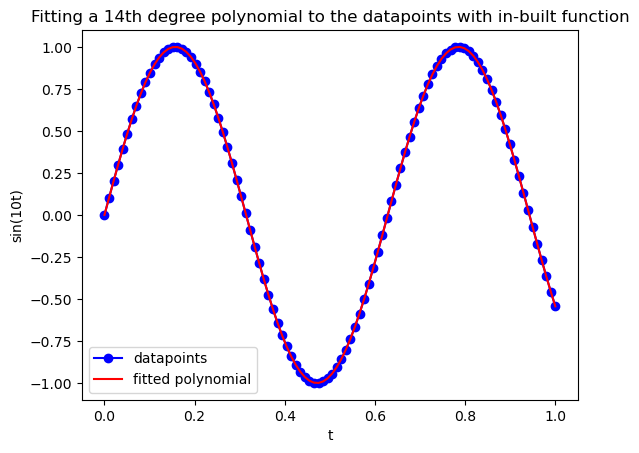

In [105]:
"""plot the in-built function and the sin(10t)"""
plt.plot(t,y,"b-o",label='datapoints')
plt.plot(t,p_inbuilt, "r-",label='fitted polynomial')
plt.legend()
plt.xlabel("t")
plt.ylabel("sin(10t)")
plt.title("Fitting a 14th degree polynomial to the datapoints with in-built function")
plt.savefig('inbuiltpoly.png')
plt.show()

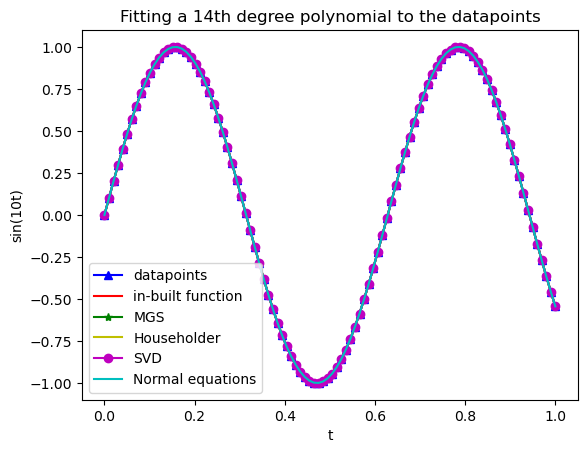

In [118]:
"""plot the difference between the methods and the original function"""
plt.plot(t,b,"b-^",label='datapoints')
plt.plot(t,p_inbuilt, "r-",label='in-built function')
plt.plot(t,p, "g-*",label='MGS')
plt.plot(t,p_householder, "y-",label='Householder')
plt.plot(t,p_svd, "m-o",label='SVD')
plt.plot(t,p_normal, "c-",label='Normal equations')
plt.legend()
plt.xlabel("t")
plt.ylabel("sin(10t)")
plt.title("Fitting a 14th degree polynomial to the datapoints")
plt.savefig('allpoly.png')
plt.show()


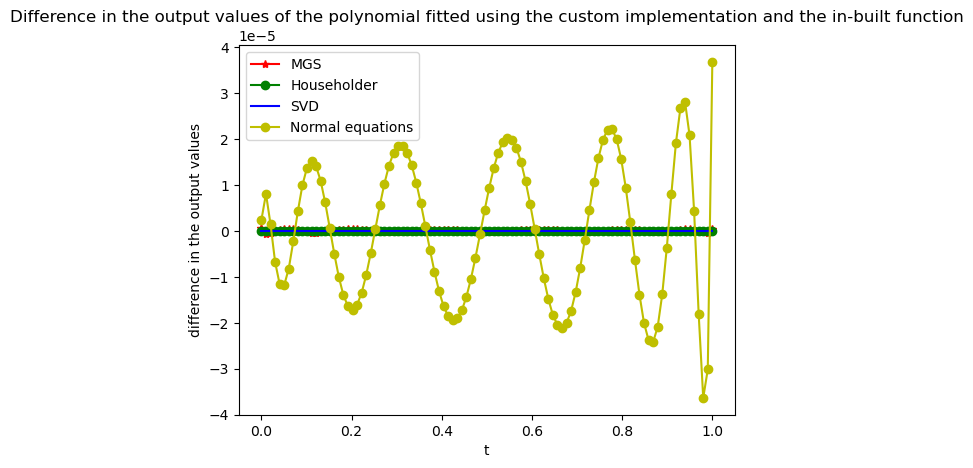

In [99]:
"""plot the difference in the output values of the polynomial fitted using the custom implementation and the in-built function"""
plt.plot(t,diff_mgs,"r-*",label='MGS')
plt.plot(t,diff_h,"g-o",label='Householder')
plt.plot(t,diff_svd,"b-",label='SVD')
plt.plot(t,diff_normal,"y-o",label='Normal equations')
plt.legend()
plt.xlabel("t")
plt.ylabel("difference in the output values")
plt.title("Difference in the output values of the polynomial fitted using the custom implementation and the in-built function")
plt.savefig('diff.png')
plt.show()


In [100]:
"""condition number of A.T @ A"""
cond_A_T_A=np.linalg.cond(A.T @ A,2)
cond_A_T_A

1.0489572501244311e+18

### This is ill-conditioned matrix and thus, the problem of solving least squares through Normal Equations is unstable. This is the reason that the error is the highest in the normal equations case.